# Spotify EDA

- The goal of this Notebook is to perform Data Cleaning, EDA and Visualization and to answer some questions related to the dataset. 


As on the date of making this notebook i.e. : 29/05/2022 . import opendatasets was not working as expected so I manually downloaded the dataset from Kaggle and then used that particular dataset. 


Dataset Source : Top Hits Spotify from 2000-2019 :  https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
projectName = 'Spotify Songs Analysis'
jovian.commit(project=projectName)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

In [5]:
df = pd.read_csv(r'E:\Python\spotify.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## 1. Data Preparation and Cleaning 

 Data Preparation and Cleaning , with context to the above dataset means removing(or adding) any data before we dive deeper and perform any analysis. 

 It is important to note that Data preparation and cleaning is an important aspect of Data Analysis because if we fail to do this step, there is a high probability that we will encounter some incorrect , or no data at all. In case of such events , it is very hard and annoying to do data cleaning while in the midst of Exploratory Data Analysis.

#### Steps : 
* If we see in the above dataset, we can observe some of the columns which are unrelated to us and the columns being : <br> danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


Let's Remove those columns from our dataset

In [6]:
df_cleaned = df.drop(df.loc[:, 'danceability':'tempo'].columns, axis = 1)

df_cleaned

,artist,song,duration_ms,explicit,year,popularity,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,pop
1,blink-182,All The Small Things,167066,False,1999,79,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,pop
...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,pop


#### Since we have cleaned the Data and produced it , we can see that we have a column mentioning the duration in milliseconds (as seen in the 'duration_ms' column) . 

#### It'll be better and intuitive to convert the duration from milliseconds to minutes in order to get a proper understanding 

In [7]:
df_cleaned['duration_min'] = (df_cleaned['duration_ms'] / 1000 )/60
df_cleaned

,artist,song,duration_ms,explicit,year,popularity,genre,duration_min
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,pop,3.519333
1,blink-182,All The Small Things,167066,False,1999,79,"rock, pop",2.784433
2,Faith Hill,Breathe,250546,False,1999,66,"pop, country",4.175767
3,Bon Jovi,It's My Life,224493,False,2000,78,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,pop,3.342667
...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,pop,3.017100
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,pop,2.973767
1997,Blanco Brown,The Git Up,200593,False,2019,69,"hip hop, country",3.343217
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,pop,2.850483


In [8]:
df_cleaned.drop("duration_ms", axis=1, inplace=True)
df_cleaned

,artist,song,explicit,year,popularity,genre,duration_min
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop,3.519333
1,blink-182,All The Small Things,False,1999,79,"rock, pop",2.784433
2,Faith Hill,Breathe,False,1999,66,"pop, country",4.175767
3,Bon Jovi,It's My Life,False,2000,78,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,False,2000,65,pop,3.342667
...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,False,2019,79,pop,3.017100
1996,Taylor Swift,Cruel Summer,False,2019,78,pop,2.973767
1997,Blanco Brown,The Git Up,False,2019,69,"hip hop, country",3.343217
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,pop,2.850483


## 2. Exploratory Analysis and Visualization


In [9]:
# before performing any further analysis. Let's save the project. 

jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

In [11]:
df_cleaned.head()

,artist,song,explicit,year,popularity,genre,duration_min
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop,3.519333
1,blink-182,All The Small Things,False,1999,79,"rock, pop",2.784433
2,Faith Hill,Breathe,False,1999,66,"pop, country",4.175767
3,Bon Jovi,It's My Life,False,2000,78,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,False,2000,65,pop,3.342667


In [12]:
df_cleaned.tail()

,artist,song,explicit,year,popularity,genre,duration_min
1995,Jonas Brothers,Sucker,False,2019,79,pop,3.017100
1996,Taylor Swift,Cruel Summer,False,2019,78,pop,2.973767
1997,Blanco Brown,The Git Up,False,2019,69,"hip hop, country",3.343217
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,pop,2.850483
1999,Post Malone,Circles,False,2019,85,hip hop,3.588000


In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        2000 non-null   object 
 1   song          2000 non-null   object 
 2   explicit      2000 non-null   bool   
 3   year          2000 non-null   int64  
 4   popularity    2000 non-null   int64  
 5   genre         2000 non-null   object 
 6   duration_min  2000 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 95.8+ KB


In [13]:
df_cleaned.shape

(2000, 7)

In [14]:
df_cleaned.describe()

,year,popularity,duration_min
count,2000.00000,2000.000000,2000.000000
mean,2009.49400,59.872500,3.812469
std,5.85996,21.335577,0.652276
min,1998.00000,0.000000,1.883333
25%,2004.00000,56.000000,3.393000
50%,2010.00000,65.500000,3.721325
75%,2015.00000,73.000000,4.135550
max,2020.00000,89.000000,8.069100


In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

### VISUALISATION 1 (BAR GRAPH)

Since some basic EDA has been done, next step is to visualise the data. 


In order to plot a bar graph which will show the total number of songs released in a particular year, the sum of all the songs released in a year by all artists have to listed out. This can be done by the following : 

In [16]:
year = df_cleaned.groupby('year').size()
year

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
dtype: int64

###### Next step is plotting the data 

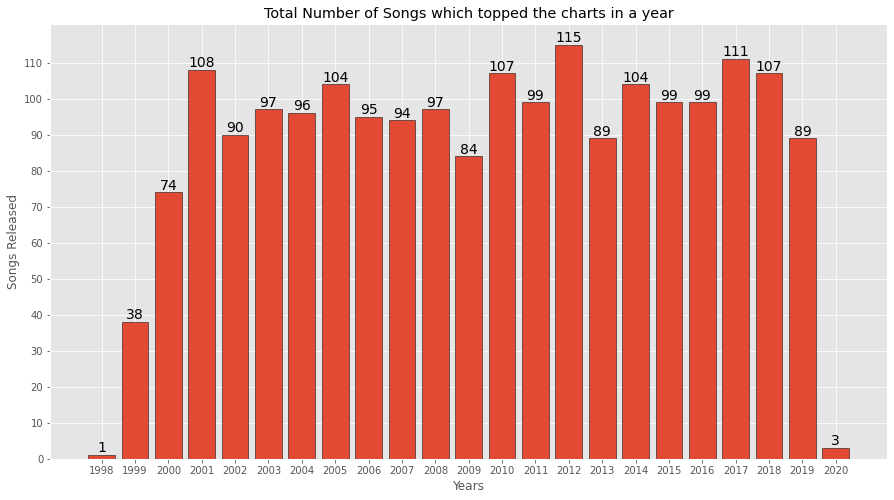

In [17]:
plt.style.use('ggplot')  

x_index = np.arange(1998,2021,1)    
y = year               

plt.figure(figsize=(15, 8))
bar = plt.bar(x_index,y,ec = 'black')

plt.xticks(ticks = x_index)
plt.yticks(np.arange(0, max(y), 10))


for text in bar:
    height = text.get_height()
    plt.text(text.get_x() + text.get_width() / 2.0, height, f'{height:.0f}', ha='center', va='bottom',fontsize = 14)


plt.title("Total Number of Songs which topped the charts in a year")
plt.xlabel("Years")
plt.ylabel("Songs Released")

plt.show()

Breaking down this code step by step : 
* Took X-Axis as years and Y-Axis as Songs released in a particular year 

* There was no space between 2 bars in the default graphs and even the years were too congested, thus causing confusion. This was countered by using the figsize funtion 

* For X-Ticks the whole of the X-index was taken adn for Y ticks the interval of 10 was taken .

* In order to get the Text displayed above the bar graph, the for loop was used along with the plt.text() function.

* Appropriate Labels and Titles were added adn then the above bar graph is displayed 



In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

### VISUALISATION 2 (SCATTERPLOT)


In order to plot a scatter plot to find out top 5 artists who have the greatest number of hits , we have to first find out the number of hits by a particular artists, this can be done by : 

In [19]:
artists = df['artist'].value_counts()
artists_num = artists.head()
artists_num


Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: artist, dtype: int64

As we can see Rihanna, Drake, Eminem, Calvin Harris and Britney Spears have the most number of hits, the next step we have to do is to plot the same. 

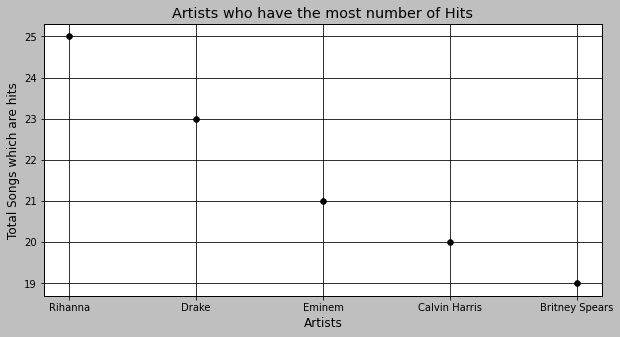

In [20]:
plt.style.use("grayscale")

x = ["Rihanna","Drake","Eminem","Calvin Harris","Britney Spears"]
y = artists_num

plt.figure(figsize=(10, 5))
plt.title("Artists who have the most number of Hits")
plt.xlabel("Artists")
plt.ylabel("Total Songs which are hits")


plt.scatter(x,y)

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

### VISUALISATION 3 (PIE CHART)

Plotting a bar graph which will show us the Top 10 genres and how many songs released under such genre <br>

In order to achieve that , we'll generate a new DataFrame

In [22]:
genre = df["genre"].value_counts()
genre_calc = pd.DataFrame(genre)
genre_name = genre_calc.reset_index()
genre_name.columns = ['genre' , 'total_songs']
top_10_genre = genre_name.head(10)

top_10_genre


,genre,total_songs
0,pop,428
1,"hip hop, pop",277
2,"hip hop, pop, R&B",244
3,"pop, Dance/Electronic",221
4,"pop, R&B",178
5,hip hop,124
6,"hip hop, pop, Dance/Electronic",78
7,rock,58
8,"rock, pop",43
9,Dance/Electronic,41


([<matplotlib.patches.Wedge at 0x246b4d455d0>,
 [Text(0.7705630559566502, 0.7850048259690819, 'pop'),
  Text(-0.5588200112612548, 0.9474809734311139, 'hip hop, pop'),
  Text(-1.0972631608402232, 0.07754712027485243, 'hip hop, pop, R&B'),
  Text(-0.7720192916420968, -0.7835727237037002, 'pop, Dance/Electronic'),
  Text(-0.040838796238940406, -1.0992416443720436, 'pop, R&B'),
  Text(0.5499999479716441, -0.952627974201466, 'hip hop'),
  Text(0.8607417700268477, -0.6849259852940677, 'hip hop, pop, Dance/Electronic'),
  Text(1.0045674064554793, -0.44815658634824507, 'rock'),
  Text(1.0705061389073767, -0.2530150322838949, 'rock, pop'),
  Text(1.0968141856422295, -0.08365788769729311, 'Dance/Electronic')],
 [Text(0.42030712143090004, 0.4281844505285901, '25.30%'),
  Text(-0.30481091523341164, 0.5168078036896985, '16.37%'),
  Text(-0.5985071786401217, 0.0422984292408286, '14.42%'),
  Text(-0.42110143180478005, -0.4274033038383819, '13.06%'),
  Text(-0.022275707039422037, -0.5995863514756601, 

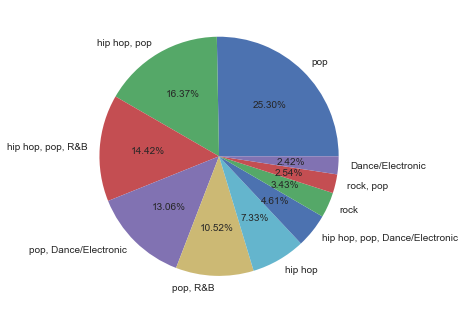

In [23]:
plt.style.use("seaborn")
x = top_10_genre['total_songs']
y = top_10_genre['genre']
plt.pie(x,labels =y,autopct = "%.2f%%")

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

### VISUALISATION 4 (HISTOGRAM)

Plotting a histogram which shows the total number of songs of all given frequencies. 

In order to achieve that we have to first create a dataframe which will show us the popularity.

In [25]:
popularity = df_cleaned["popularity"]
popularity1 = pd.DataFrame(popularity)
popularity1

,popularity
0,77
1,79
2,66
3,78
4,65
...,...
1995,79
1996,78
1997,69
1998,75


(array([180.,   4.,   8.,  26., 101., 341., 613., 592., 135.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <BarContainer object of 9 artists>)

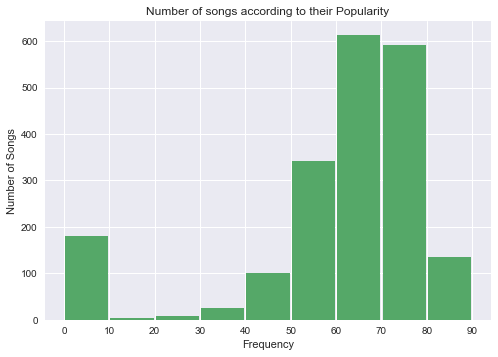

In [26]:
bins = [0,10,20,30,40,50,60,70,80,90]
plt.xticks(ticks = bins)
plt.xlabel("Frequency")
plt.ylabel("Number of Songs")
plt.title("Number of songs according to their Popularity")
hist = plt.hist(popularity1, bins=bins , rwidth=0.95)   

plt.hist(popularity1, bins=bins , rwidth=0.95)   

In the above graph , we can see that the total number of songs which have Popularity between 0 and 10 are in between 100 - 200.

This basically means that there are approx ~175 songs whose popularity is between 0 and 10. 

This applies to all of the plots in the above Histogram

## 3. Answering Questions About The Data

Nothing Significant was observed in the above data but some questions have to be answered , such as 

* How many songs have a particular artist , say Britney Spears has released overall during this time frame? <br>
* Listing out the songs which are greater than 3 minutes. <br>

##### Question 1 : How many popular songs an artist totally has? <br>


In [27]:
Total_britney = df[df['artist']=="Britney Spears"]["song"].count()

Total_britney

19

Let's change the artist's name to Eminem and see how many chartbusters he has : 

In [28]:
Total_eminem = df[df['artist']=="Eminem"]["song"].count()

Total_eminem

21

##### Question 2 : Listing out the songs which are greater than 4 minutes. <br>

In [29]:
time_filter =df_cleaned.query("`duration_min` >= 4 ")
time_filter


,artist,song,explicit,year,popularity,genre,duration_min
2,Faith Hill,Breathe,False,1999,66,"pop, country",4.175767
5,Sisqo,Thong Song,True,1999,69,"hip hop, pop, R&B",4.228883
6,Eminem,The Real Slim Shady,True,2000,86,hip hop,4.736667
7,Robbie Williams,Rock DJ,False,2000,68,"pop, rock",4.309333
8,Destiny's Child,Say My Name,False,1999,75,"pop, R&B",4.522217
...,...,...,...,...,...,...,...
1950,Dave,Location (feat. Burna Boy),True,2019,78,hip hop,4.021550
1960,Bad Bunny,Callaita,True,2019,81,latin,4.175550
1964,Lunay,Soltera - Remix,False,2019,70,"pop, latin",4.434767
1980,Anuel AA,Secreto,False,2019,75,latin,4.313333


##### Question 3 : Listing out the songs which have popularity greater than a certain value

In [30]:
pop_input = int(input("enter Value :"))

popularity = df_cleaned.query(f"`popularity` >= {pop_input} ")
popularity

enter Value :83


,artist,song,explicit,year,popularity,genre,duration_min
6,Eminem,The Real Slim Shady,True,2000,86,hip hop,4.736667
20,Linkin Park,In the End,False,2000,83,"rock, metal",3.614667
102,Eminem,Stan,True,2000,83,hip hop,6.735100
201,Eminem,Without Me,True,2002,87,hip hop,4.838667
209,Eminem,'Till I Collapse,True,2002,85,hip hop,4.963100
215,Linkin Park,In the End,False,2000,83,"rock, metal",3.614667
1227,Bruno Mars,Locked out of Heaven,False,2012,85,pop,3.891300
1304,Bruno Mars,Locked out of Heaven,False,2012,85,pop,3.891300
1306,Daft Punk,Get Lucky (feat. Pharrell Williams & Nile Rodg...,False,2013,83,"hip hop, Dance/Electronic",4.140217
1311,Tom Odell,Another Love,True,2013,88,pop,4.072667


In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'

##### Question 4 : Listing out the songs according to the genre

In order to achieve this , we have to list out all of the unique data from the genre column. This can be achieved by : 

In [32]:
unique_genre = df_cleaned["genre"].drop_duplicates()


unique_genre

0                                         pop
1                                   rock, pop
2                                pop, country
3                                 rock, metal
5                           hip hop, pop, R&B
6                                     hip hop
7                                   pop, rock
8                                    pop, R&B
9                            Dance/Electronic
14                      pop, Dance/Electronic
21        rock, Folk/Acoustic, easy listening
25                                      metal
30                               hip hop, pop
33                                        R&B
40                                 pop, latin
59                        Folk/Acoustic, rock
60      pop, easy listening, Dance/Electronic
66                                       rock
69                         rock, blues, latin
77                           pop, rock, metal
80                           rock, pop, metal
87                               h

After generating the above genre we can now filter our data with this list. It can be achieved by :

In [33]:
gen = input("Enter genre : ")
genre = df_cleaned[df_cleaned['genre'] == gen]
genre

Enter genre : pop


,artist,song,explicit,year,popularity,genre,duration_min
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop,3.519333
4,*NSYNC,Bye Bye Bye,False,2000,65,pop,3.342667
10,Gigi D'Agostino,L'Amour Toujours,False,2011,1,pop,3.979317
11,Eiffel 65,Move Your Body - Gabry Ponte Original Radio Edit,False,1999,56,pop,4.481050
12,Bomfunk MC's,Freestyler,False,2000,55,pop,5.105550
...,...,...,...,...,...,...,...
1985,Ed Sheeran,Cross Me (feat. Chance the Rapper & PnB Rock),True,2019,64,pop,3.436433
1990,Sam Smith,How Do You Sleep?,False,2019,73,pop,3.370067
1995,Jonas Brothers,Sucker,False,2019,79,pop,3.017100
1996,Taylor Swift,Cruel Summer,False,2019,78,pop,2.973767


## Conclusion 

- In this project we have performed basic EDA and Visualizations on the Most Hit songs on Spotify 
- The Dataset had some unnecessary columns, so I dropped that in order to get a better understanding of the Dataset.
- As seen in Visualisation 2, we can see that Rihanna has most number of Hits as compared to any other artists
- As seen in Visualisation 4, Most songs fall between the 60-80 popularity range.
- We can derive from Visualisation 3 that Pop Genre has most number of songs , and that it is a very saturated genre

In [34]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paarthurnax-098/spotify-songs-analysis" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paarthurnax-098/spotify-songs-analysis


'https://jovian.ai/paarthurnax-098/spotify-songs-analysis'